# DATA CLEANING OF RETAIL SALES DATASET USING PYTHON AND PANDAS
- Importing libraries
- Extracting dimensions
- Standard Deviation
- Categorizing columns

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
sns.set()

In [24]:
df = pd.read_csv('retail_sales_dataset.csv')

In [25]:
df.head(10) 
# lets take the first 10 attributes 

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [26]:
df.shape
#the dimension of the data is defined

(1000, 9)

In [27]:
df.info
# range of columns and rows will be displayed

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

FINDING NULL VALUES 

In [28]:
df.isnull().sum()# it is used to sum up all values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Standard Deviation of the dataset

In [29]:
df.describe()
#this is used to discribe all the statistics such as mean,median and mode 

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


# Categorizing columns

FINDING NUMERIC COLUMNS

In [30]:
df.columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes !='object'):
        num_col.append(col)
print(num_col)
# the function is used only to diaplay numeric values 

['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']


FINDING CATEGORICAL COLUMNS 

In [31]:
df.columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes =='object'):
        cat_col.append(col)
print(cat_col)

['Date', 'Customer ID', 'Gender', 'Product Category']


# EXPLORATORY DATA ANALYSIS 
- Analysis of new trends and projection of insights

Showing trend analysis of sales over the year in terms of month

In [32]:
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month_name()
df['month'].head()#Adding a new column called month to make the analysis easier

0    November
1    February
2     January
3         May
4         May
Name: month, dtype: object

Adding a new column month is used to ease the prediction analysis

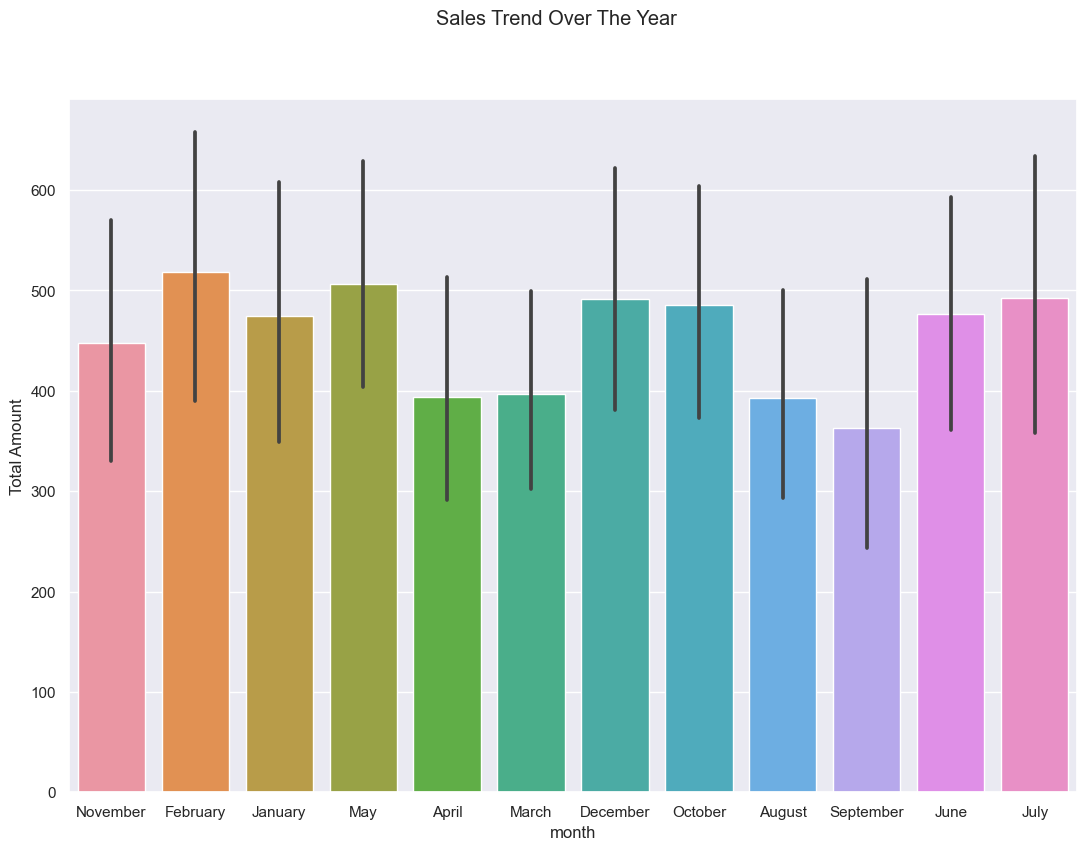

In [33]:
plt.figure(figsize=(13,9))
sns.barplot(x='month',y='Total Amount',data=df)
plt.suptitle('Sales Trend Over The Year')
plt.show()
# it produce more accuracy then barplot 
# calculating the sales amount with respect to months

NUMBER OF SALES TAKEN PLACE BY TRANSACTION FOR EACH MONTH

In [34]:
df['month']= df['Date'].dt.month
transact_count=df.groupby('month')['Transaction ID'].count() # In here we can see that the transaction id has been grouped according to the month

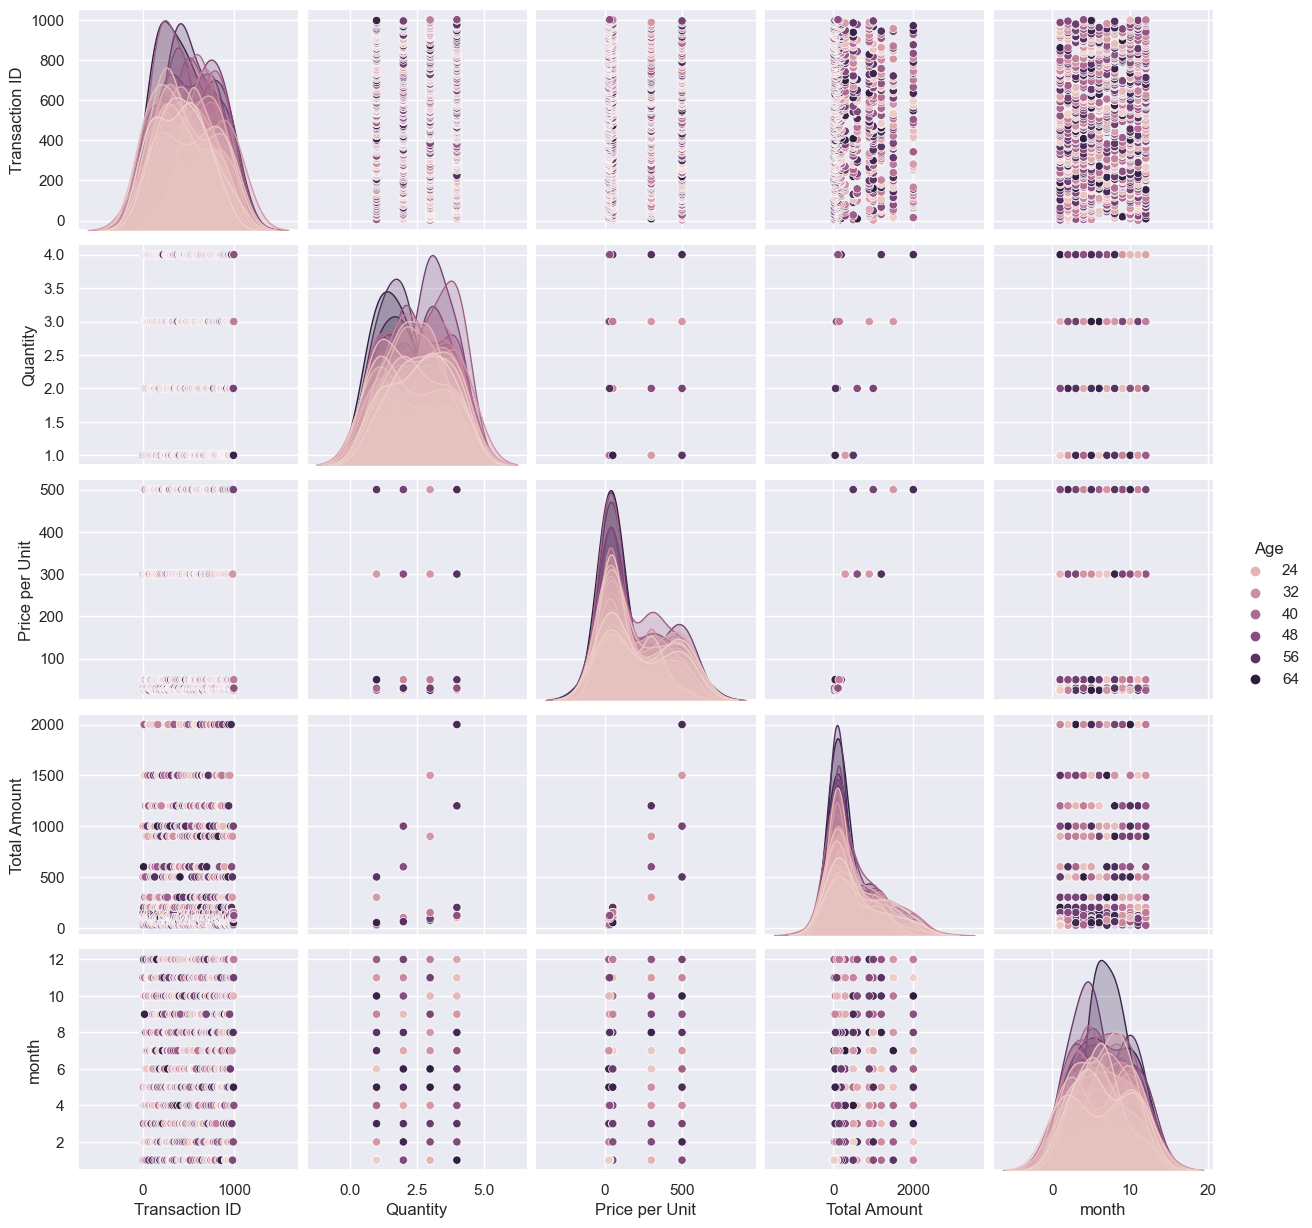

In [17]:
sns.pairplot(data=df,hue='Age')# analysis done according to the age of the customer whom have purchased frequently 

In [14]:
transact_count

month
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: Transaction ID, dtype: int64

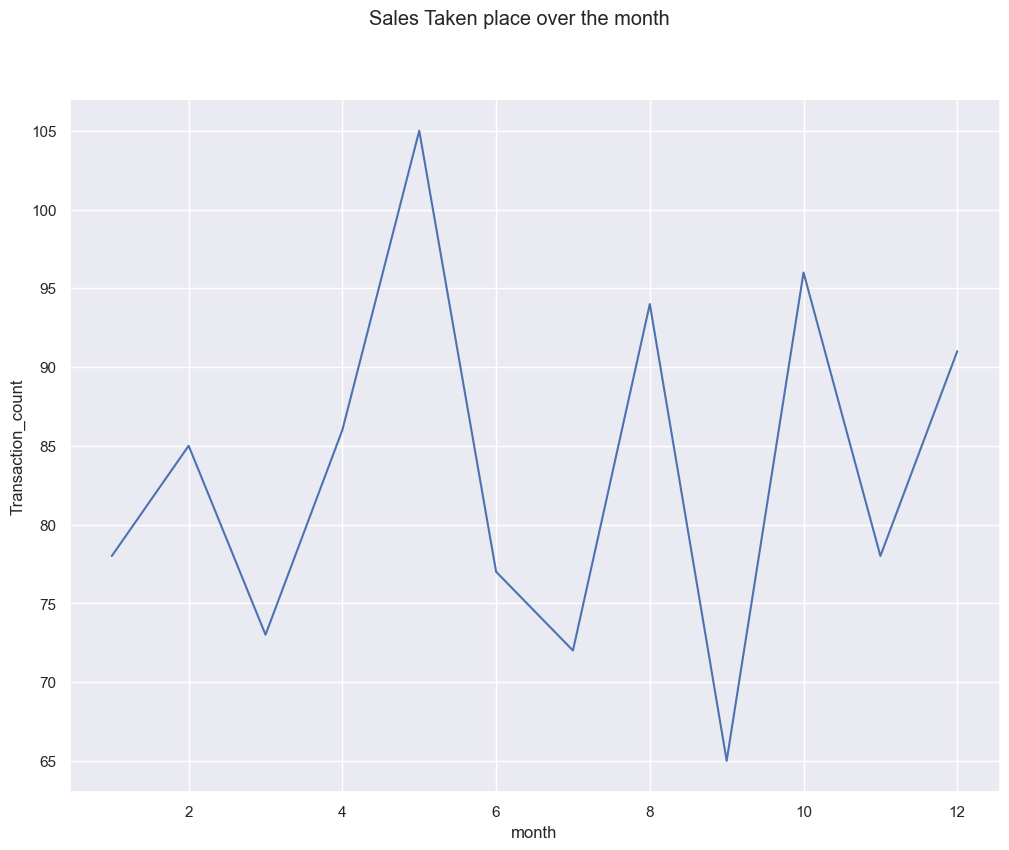

In [35]:
plt.figure(figsize=(12,9))
sns.lineplot(x=transact_count.index,y=transact_count.values)
plt.suptitle('Sales Taken place over the month')
plt.ylabel('Transaction_count')
plt.show()
# it produce more accuracy then barplot
#the values and index according to the months has been plotted

# CUSTOMER PURCHASE BEHAVIOUR 
- From the above trends we can conclude transaction details over the year and the amount of purchased amount by the customer
-In the following we will make analysis of sales product categories
- three main aspects is to create the foollowing:
              -quantity of purchasement
              -customer purchasing
              -age and gender distribution according to the purchasement

In [36]:
col='Product Category'
plot=px.histogram(df, x=col, title='Product Category', labels={'Product Category': 'Product Category', 'count': 'Frequency'})
plot.update_traces(texttemplate='%{y}', textposition='outside')
plot.show()

AGE AND GENEDER DISTRIBUTION 

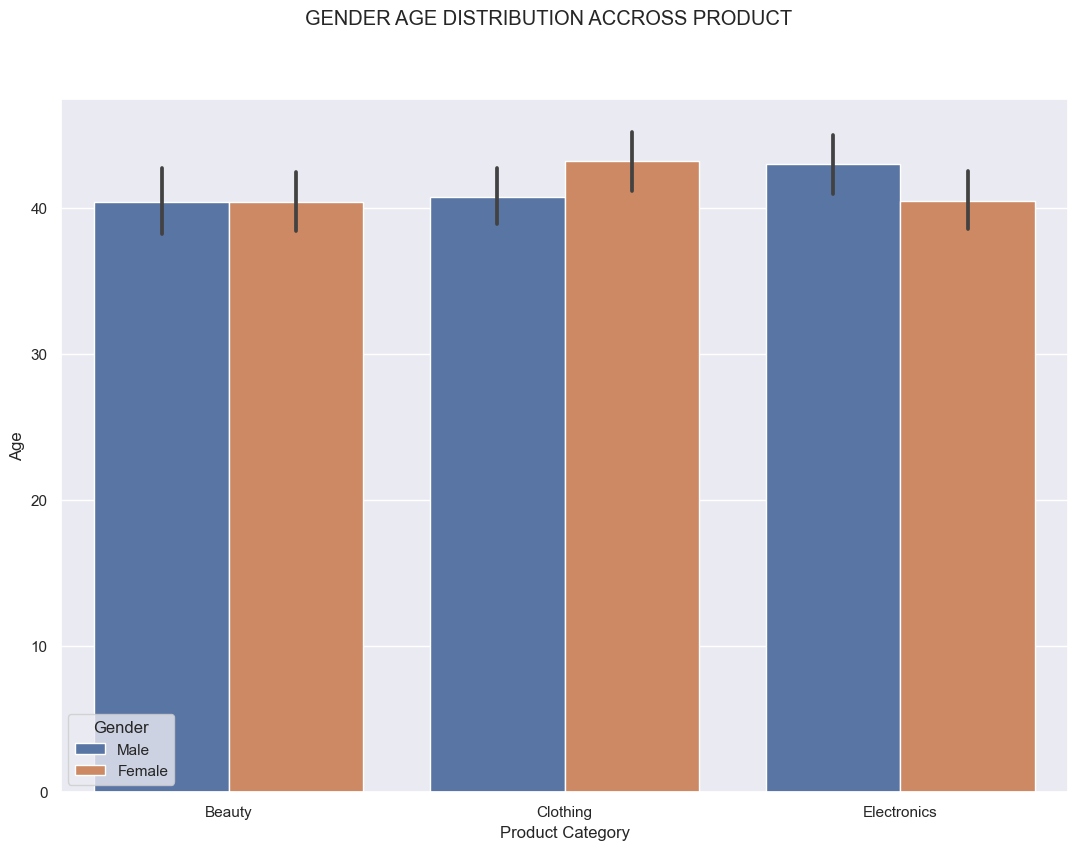

In [81]:
plt.figure(figsize=(13,9))
sns.barplot(x='Product Category',y='Age',hue='Gender',data=df)
plt.suptitle('GENDER AGE DISTRIBUTION ACCROSS PRODUCT')
plt.show()

In [128]:
# lets divide the age category with respect to there genders accordingly
age_bins = [0, 18, 25, 35, 50, 100]#given age criteria 
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']#spliting age 
df['Age Group'] = pd.cut(df['Age'], bins = age_bins, labels=age_group)#age group will consist of the criteria 
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,26-35


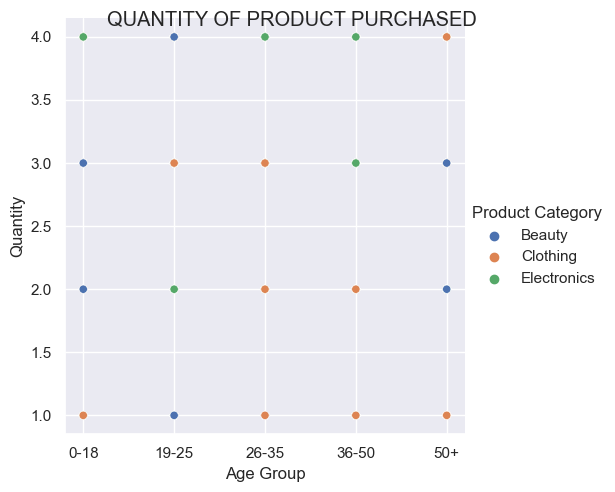

In [129]:

sns.relplot(x='Age Group',y='Quantity',hue='Product Category',data=df)
plt.suptitle('QUANTITY OF PRODUCT PURCHASED')
plt.show()# the age group and quantity is established according to the product cateegory

CUSTOMER EXPENDITURE ANALYSIS

Text(0.5, 1.0, 'Customer Expenditure')

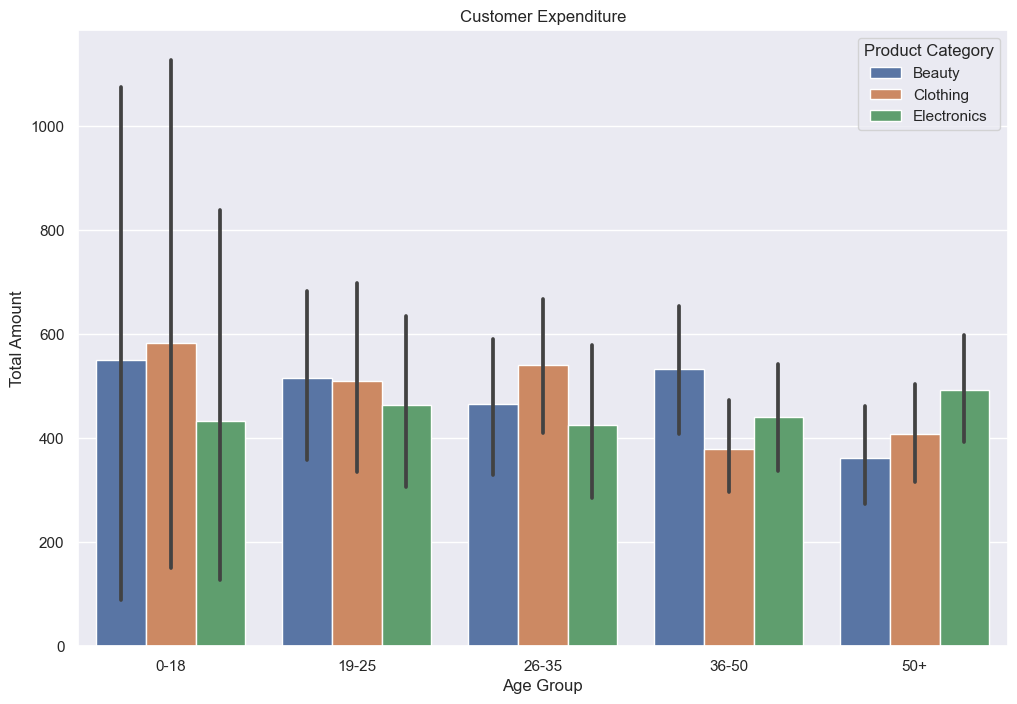

In [89]:
plt.figure(figsize=(12,8))
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=df)
plt.title('Customer Expenditure')# finally we have the customer expenditure 
#the total amount of sales according to the age group is concluded.

# TIME SERIES OF DATA DISTRIBUTION

# SERIES OF SALES THAT TOOK PLACE OVER THE MONTH

In [13]:
df['Total Amount']

0       150
1      1000
2        30
3       500
4       100
       ... 
995      50
996      90
997     100
998     150
999     120
Name: Total Amount, Length: 1000, dtype: int64

In [18]:
df = pd.read_csv("retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_sale = df.resample('M').sum()

plot = px.line(monthly_sale, x=monthly_sale.index, y='Total Amount', title="SALES OVER THE MONTH ")
plot.update_xaxes(title_text='MONTH')
plot.update_yaxes(title_text='Total Amount') 
plot.update_traces(mode='lines+markers', hovertemplate='%{y:.2f} USD<br>%{x|%Y-%m}')
plot.show()
#the sales per month according to total amount is given bellow 
# the sales amount is given in terms of USD .

In [37]:
df = pd.read_csv("retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
weekly_update = df.resample('W').sum()

plot = px.line(weekly_update, x=weekly_update.index, y='Total Amount', title="SALES OVER THE WEEK")
plot.update_xaxes(title_text='WEEK')
plot.update_yaxes(title_text='Total amount') 
plot.update_traces(mode='lines+markers', hovertemplate='%{y:.2f} USD<br>%{x|%Y-%m}')
plot.show()
# this is the weekly data of the sales 

DAILY SALES

In [38]:
df = pd.read_csv("retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
daily_update = df.resample('D').sum()

plot = px.line(daily_update, x=daily_update.index, y='Total Amount', title="SALE OF THE DAY")
plot.update_xaxes(title_text='DAY')
plot.update_yaxes(title_text='Total Amount')  # Corrected typo here
plot.update_traces(mode='lines+markers', hovertemplate='%{y:.2f} USD<br>%{x|%Y-%m}')
plot.show()

# CREATING A BASE MODEL USING LOGISTIC REGRESSION AND ANALYSIS
- for cretaing a basemodel we need to train and split the data
- The model must be able to produce atleast 33% of accuracy
- importing a lenear regression model 
- splitting the train and test data
- build a scatter plot and give the x and y names 
- update the traces along wiht the values 
- get the index value of the data set 
- finnaly show the plot.

In [39]:
df=pd.read_csv("retail_sales_dataset.csv")

# Creating train/test split
x = df[['Age', 'Quantity', 'Price per Unit']]
y = df['Total Amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating model
clf = LinearRegression()
clf.fit(x_train, y_train)
#if the given dataset is in terms of textbased and contains a linear distribution then we can move to linearregression algorithm
# we can also use random classification if needed it more productive
# Making predictions
y_prediction = clf.predict(x_test)

# Evaluating model performance
r2 = r2_score(y_test, y_prediction) # it is used to find the mean of the testing and trained model
print(f"R-squared (R2) Score: {r2}")
df1 = pd.DataFrame({'absolute values': y_test, 'Predictions': y_prediction})

#scatter plot
plot = px.scatter(df1, x='absolute values', y='Predictions', title='absolute values vs. Predicted Values')
plot.update_traces(marker=dict(size=15, opacity=0.5, line=dict(width=4, color='green')))

# Add hover data (x and y coordinates)
plot.update_traces(customdata=df.index)

plot.update_traces(hovertemplate='absolute values: %{x}<br>Predicted Value: %{y}<br>Sample Index: %{customdata}')
plot.add_trace(go.Scatter(x=df1['absolute values'], y=df1['absolute values'], mode='lines', name='Trendline'))

# Customize the layout
plot.update_layout(
    xaxis_title="absolute values",
    yaxis_title="Predictions"
)

plot.show()

R-squared (R2) Score: 0.8568772264250432


In [ ]:
# here we can see trendline for the predicted values 
#here we have a match at about absolute value 900 with a sample index:99 with a predicted value:865.3
#thank you for watching !